In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("C:/Users/Acer/Documents/MedMate_API_demo-main/results.csv")

In [3]:
df.head(70)

,audio,audio_length,transcribe,wer,speed,wrong,model
0,HPI_1,26.581312,cách thở vị thay giờ bệnh nhân đột ngồi xuất h...,0.396040,102.321762,"vào->thở, viện->vị, hai->thay, ngột->ngồi, dữ-...",Whisper
1,HPI_1,26.581312,cách vào viện hai giờ bệnh nhân đột ngột xuất ...,0.019802,1.518609,"dao->do, lên->trên",ChunkFormer
2,HPI_1,26.581312,CÁCH VÀO VIỆN HAI GIỜ BỆNH NHÂN ĐỘT NGỘT XUẤT ...,0.009901,1.085468,lên->trên,Zipformer
3,HPI_2,21.056000,cách giờ viện ba giờ sau khi ngủ sậy bệnh nhân...,0.279070,65.040168,"vào->giờ, dậy->sậy, nói->đói, sang->săn, yếu->...",Whisper
4,HPI_2,21.056000,cách vào viện ba giờ sau khi ngủ dậy bệnh nhân...,0.058140,1.203521,"nhưng->như, bệnh->, một->, trăm->, ba->",ChunkFormer
...,...,...,...,...,...,...,...
65,PE_1_2,26.005312,THẤP LỒNG NGỰC DI ĐỘNG ĐỀU THEO NHỊP THỞ KHÔNG...,0.228916,1.020473,"hô->thấp, hô->, rì->dì, ran->gian, mỏm->mỏng, ...",Zipformer
66,PE_1_3,14.997312,tiêu hóa bụng mềm không chướng không đau lăn l...,0.371429,43.379707,"gan->lăn, lách->lấy, sờ->sợ, nhu->như, động->đ...",Whisper
67,PE_1_3,14.997312,phổi tiêu hóa bụng mềm không chướng không đau ...,0.285714,0.807560,"->phổi, gan->đan, nhu->như, động->đậu, niệu->n...",ChunkFormer
68,PE_1_3,14.997312,PHỔI TIÊU HÓA BỤNG MỀM KHÔNG CHƯỚNG KHÔNG ĐAU ...,0.228571,0.559410,"->phổi, gan->gian, nhu->như, động->đậu, ->âm, ...",Zipformer


In [6]:
df.columns = df.columns.str.lower().str.strip()

# --- Tính tốc độ thực tế (xếp hạng model theo tốc độ và độ chính xác) ---
df["rtf"] = df["speed"] / df["audio_length"]  # RTF = Real speed Factor (thấp hơn => nhanh hơn)

# --- Tổng hợp theo từng mô hình ---
summary = df.groupby("model").agg({
    "wer": ["mean", "std"],
    "rtf": ["mean", "std"],
    "speed": ["sum"],
    "audio_length": ["sum"]
}).reset_index()

# --- Tính tốc độ trung bình toàn hệ thống (tổng thời gian / tổng độ dài) ---
summary["overall_rtf"] = summary["speed"]["sum"] / summary["audio_length"]["sum"]

# --- Xếp hạng theo WER và tốc độ ---
summary["rank_wer"] = summary["wer"]["mean"].rank()
summary["rank_speed"] = summary["rtf"]["mean"].rank(ascending=True)
summary["overall_rank"] = summary["rank_wer"] + summary["rank_speed"]

# --- Hiển thị kết quả ---
print(summary.sort_values("overall_rank"))


         model       wer                 rtf                  speed  \
                    mean       std      mean       std          sum   
2    Zipformer  0.194292  0.146782  0.040391  0.008675    45.394445   
0  ChunkFormer  0.202291  0.157726  0.056134  0.008558    62.228385   
1      Whisper  0.470889  0.153642  3.689650  0.545345  4274.701351   

  audio_length overall_rtf rank_wer rank_speed overall_rank  
           sum                                               
2  1134.527938    0.040012      1.0        1.0          2.0  
0  1134.527938    0.054850      2.0        2.0          4.0  
1  1134.527938    3.767824      3.0        3.0          6.0  


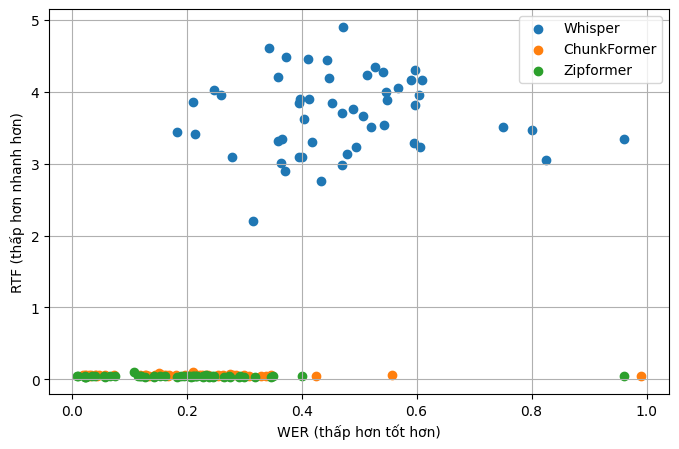

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))
for model in df["model"].unique():
    ax1.scatter(df[df.model==model]["wer"], df[df.model==model]["rtf"], label=model)
ax1.set_xlabel("WER (thấp hơn tốt hơn)")
ax1.set_ylabel("RTF (thấp hơn nhanh hơn)")
ax1.legend()
ax1.grid(True)
plt.show()
